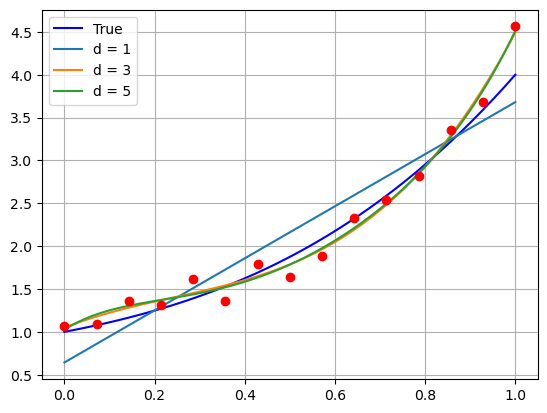

In [1]:
### Ri-definiamo i dati come fatto precedentemente 
# (imposto sigma = 0.2 invece che 0.1 per far risaltare meglio)
import numpy as np
import matplotlib.pyplot as plt

# Definiamo la funzione f(x, alpha) che prende in input il vettore alpha dei coefficienti e un valore x, e ritorna il valore del rispettivo polinomio
def f(x, alpha):
    d = alpha.shape[0] - 1 # abbiamo detto che la shape di alpha è (d+1, )

    y = np.zeros_like(x) # Questa è l'unica riga che dobbiamo cambiare rispetto a prima!
    for i in range(d+1):
        y = y + alpha[i] * x ** i
    return y

d_true = 3 # grado vero del polinomio
alpha_true = np.ones((d_true+1,))

# Numero di dati
n = 15

# Definiamo la deviazione standard del rumore
sigma = 0.2

# Generiamo il rumore
e = np.random.normal(loc=0, scale=sigma, size=(n, ))

# Definiamo gli x_i
x = np.linspace(0, 1, n)
y = f(x, alpha_true) + e

# Definiamo la matrice di Vandermonde
def vandermonde(x, d):
    r"""
    Preso in input un numpy array "x" di lunghezza (n, ) contentente i dati, e un valore intero "d" rappresentante il grado del polinomio, 
    costruisce e ritorna la matrice di vandermonde X di grado d, associata a x.

    Parameters:
    x (ndarray): Il vettore dei dati di input.
    d (int): Il grado massimo del polinomio.

    Returns:
    X (ndarray): La matrice di Vandermonde di grado "d", associata ad x.
    """
    n = x.shape[0]
    
    # Inizializzo la matrice di Vandermonde con shape (n, d+1)
    X = np.zeros((n, d+1))
    
    # Costruisco la matrice di Vandermonde
    for i in range(d+1):
        X[:, i] = x ** i
    return X

## Calcoliamo la soluzione con d variabile tra 0 e 4 e salviamole in una lista
alpha_chol = []
for d in range(6):
    # Matrice di Vandermonde di grado d
    X = vandermonde(x, d)

    # Troviamo la matrice L tale che X^T X = L L^T
    L = np.linalg.cholesky(X.T @ X)

    ###### Risolviamo il primo sistema:
    # Calcoliamo il termine noto X^T y
    Xty = X.T @ y

    # Troviamo z
    z = np.linalg.solve(L, Xty)

    ###### Risolviamo il secondo sistema:
    # Troviamo alpha
    alpha_chol.append(np.linalg.solve(L.T, z))

# Visualizziamo il plot
xx = np.linspace(0, 1, 100)
yy_true = f(xx, alpha_true)
legend = ["True"]

plt.plot(xx, yy_true, 'b')
for d in range(1, 6, 2):
    yy_chol = f(xx, alpha_chol[d])
    plt.plot(xx, yy_chol)
    legend.append(f"d = {d}")
plt.plot(x, y, 'ro')
plt.legend(legend)
plt.grid()
plt.show()

In [2]:
def residuo(X, y, alpha):
    r = np.linalg.norm(X @ alpha - y) ** 2
    return r

for d in range(6):
    # Matrice di Vandermonde di grado d
    X = vandermonde(x, d)

    print(f"Residuo per d = {d}: {residuo(X, y, alpha_chol[d])}.")

Residuo per d = 0: 15.226258219028505.
Residuo per d = 1: 2.0446252514250354.
Residuo per d = 2: 0.3789625593465004.
Residuo per d = 3: 0.18084065682790015.
Residuo per d = 4: 0.18081400297500388.
Residuo per d = 5: 0.1760406591381283.


In [3]:
# Definiamo il valore per il parametro "lambda"
lmbda = 1 # NOTA: il nome "lambda" è riservato nel linguaggio di Python.
             #       usare una storpiatura del nome come "lmbda"

# Definiamo la matrice A := (X^T X + lambda * I)
A = X.T @ X + lmbda * np.eye(d+1)

# Calcoliamo la sua decomposizione di Cholesky
L = np.linalg.cholesky(A)

# Risolviamo i due sistemi triangolari
z = np.linalg.solve(L, X.T @ y)
alpha_chol = np.linalg.solve(L.T, z)

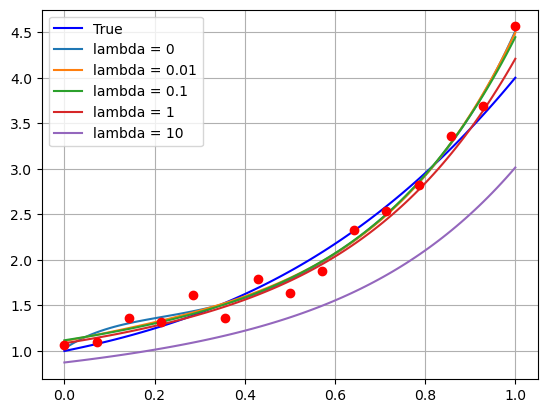

In [4]:
## Calcoliamo le soluzioni con lambda variabile e salviamole in una lista
lmbda_list = [0, 1e-2, 1e-1, 1, 10]

# Matrice di Vandermonde di grado d
d = 5
X = vandermonde(x, d)

alpha_chol = []
for lmbda in lmbda_list:
    # Troviamo la matrice L tale che X^T X = L L^T
    L = np.linalg.cholesky(X.T @ X + lmbda * np.eye(d+1))

    ###### Risolviamo il primo sistema:
    # Calcoliamo il termine noto X^T y
    Xty = X.T @ y

    # Troviamo z
    z = np.linalg.solve(L, Xty)

    ###### Risolviamo il secondo sistema:
    # Troviamo alpha
    alpha_chol.append(np.linalg.solve(L.T, z))

# Visualizziamo il plot
xx = np.linspace(0, 1, 100)
yy_true = f(xx, alpha_true)
legend = ["True"]

plt.plot(xx, yy_true, 'b')
for i, lmbda in enumerate(lmbda_list):
    yy_chol = f(xx, alpha_chol[i])
    plt.plot(xx, yy_chol)
    legend.append(f"lambda = {lmbda}")
plt.plot(x, y, 'ro')
plt.legend(legend)
plt.grid()
plt.show()